# Offline Evaluation Metrics Visualizations

This notebook visualizes user-specific performance metrics of various recommenders in the mind-subset dataset to assess effectiveness and ranking overlap. We explore two metric groups:

1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

> [!NOTE]
> This is a *parameterized* notebook, and is used to render the other specific evaluation notebooks with [Papermill](https://papermill.readthedocs.io/en/latest/).  By default, it displays
> the MIND Subset results, for easy editing.

In [1]:
EVAL_NAME = "mind-subset"

In [2]:
# Parameters
EVAL_NAME = "mind-subset"

## Setup

### Importing Libraries

PyData packages:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code and display support:

In [4]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

### Loading Data

In [5]:
mind_subset_user_metrics = pd.read_csv(f"../outputs/{EVAL_NAME}-profile-metrics.csv.gz")
mind_subset_user_metrics.head()

,pipeline,profile_id,Unnamed: 0,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,mmr,00410eda-2611-5ecd-a53b-22b6d97c7a26,0,True,0.000000,0.356207,0.142857,0.319285,0.532901
1,mmr,004fbc6f-e842-5b58-8345-73a4dbf06a69,1,True,0.000000,0.000000,0.000000,0.216469,0.325209
2,mmr,00523b6e-a6b7-5b79-be99-0c95035bd0f5,2,True,0.430677,0.430677,0.200000,0.279163,0.481313
3,mmr,0120aa53-e102-5328-8a96-2a71a9bf9083,3,True,0.500000,0.500000,0.250000,0.319816,0.507185
4,mmr,01afa896-a556-552c-8d78-f16b81b285c1,4,True,0.000000,0.193426,0.166667,0.247816,0.379968


In [6]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## Results

### Effectiveness Metrics

NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

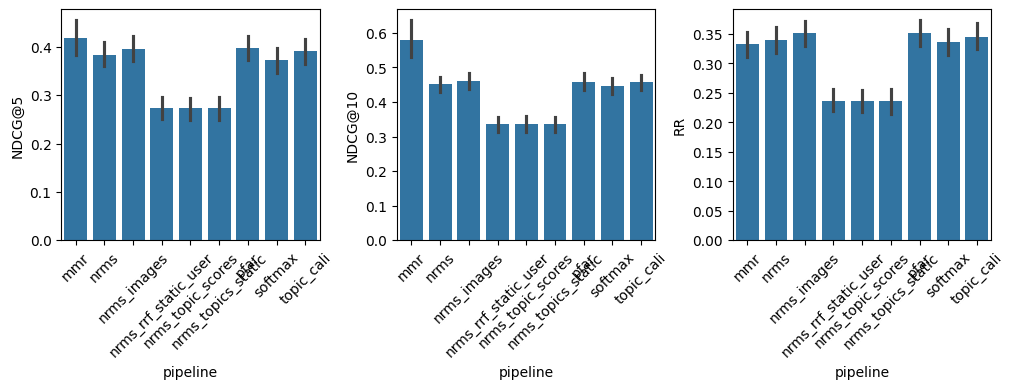

In [7]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_subset_user_metrics, x="pipeline", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [8]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_subset_user_metrics, "pipeline", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"mmr 0.418(0.384,0.452)","0.554(0.512,0.598)","0.000(0.000,0.000)","0.208(0.000,0.281)","1.000(1.000,1.000)",
"nrms 0.384(0.359,0.409)","0.407(0.398,0.417)","0.000(0.000,0.000)","0.250(0.202,0.380)","1.000(1.000,1.000)",
"nrms_images 0.396(0.371,0.422)","0.411(0.402,0.421)","0.000(0.000,0.000)","0.315(0.215,0.403)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.273(0.249,0.296)","0.377(0.363,0.391)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms_topic_scores 0.273(0.249,0.296)","0.377(0.363,0.391)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms_topics_static 0.273(0.250,0.296)","0.377(0.363,0.391)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"pfar 0.398(0.373,0.424)","0.408(0.398,0.418)","0.000(0.000,0.000)","0.319(0.250,0.431)","1.000(1.000,1.000)",
"softmax 0.373(0.348,0.399)","0.408(0.399,0.419)","0.000(0.000,0.000)","0.240(0.138,0.319)","1.000(1.000,1.000)",
"topic_cali 0.392(0.366,0.417)","0.407(0.398,0.417)","0.000(0.000,0.000)","0.315(0.215,0.380)","1.000(1.000,1.000)",


"mmr 0.579(0.527,0.629)","0.819(0.732,0.912)","0.000(0.000,0.000)","0.384(0.356,0.387)","1.000(1.000,1.000)",
"nrms 0.452(0.429,0.474)","0.368(0.358,0.378)","0.000(0.000,0.000)","0.387(0.362,0.431)","1.000(1.000,1.000)",
"nrms_images 0.461(0.438,0.485)","0.374(0.365,0.384)","0.000(0.000,0.000)","0.387(0.380,0.431)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.336(0.313,0.359)","0.358(0.346,0.370)","0.000(0.000,0.000)","0.315(0.250,0.333)","1.000(1.000,1.000)",
"nrms_topic_scores 0.336(0.314,0.358)","0.358(0.346,0.371)","0.000(0.000,0.000)","0.315(0.250,0.333)","1.000(1.000,1.000)",
"nrms_topics_static 0.336(0.314,0.358)","0.358(0.346,0.371)","0.000(0.000,0.000)","0.315(0.250,0.333)","1.000(1.000,1.000)",
"pfar 0.459(0.435,0.481)","0.374(0.364,0.384)","0.000(0.000,0.000)","0.408(0.387,0.431)","1.000(1.000,1.000)",
"softmax 0.446(0.423,0.469)","0.369(0.360,0.380)","0.000(0.000,0.000)","0.387(0.356,0.427)","1.000(1.000,1.000)",
"topic_cali 0.457(0.435,0.480)","0.370(0.361,0.380)","0.000(0.000,0.000)","0.390(0.380,0.431)","1.000(1.000,1.000)",


"mmr 0.333(0.310,0.355)","0.357(0.344,0.371)","0.000(0.000,0.000)","0.200(0.167,0.200)","1.000(1.000,1.000)",
"nrms 0.340(0.318,0.360)","0.347(0.334,0.362)","0.000(0.000,0.000)","0.200(0.200,0.250)","1.000(1.000,1.000)",
"nrms_images 0.351(0.329,0.373)","0.354(0.341,0.367)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.236(0.217,0.255)","0.308(0.292,0.326)","0.000(0.000,0.000)","0.125(0.125,0.143)","1.000(0.500,1.000)",
"nrms_topic_scores 0.236(0.217,0.255)","0.308(0.292,0.326)","0.000(0.000,0.000)","0.125(0.125,0.143)","1.000(0.500,1.000)",
"nrms_topics_static 0.236(0.217,0.255)","0.308(0.291,0.326)","0.000(0.000,0.000)","0.125(0.125,0.143)","1.000(0.500,1.000)",
"pfar 0.351(0.328,0.373)","0.356(0.343,0.370)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"softmax 0.336(0.314,0.359)","0.351(0.338,0.366)","0.000(0.000,0.000)","0.200(0.200,0.250)","1.000(1.000,1.000)",
"topic_cali 0.345(0.324,0.367)","0.352(0.339,0.365)","0.000(0.000,0.000)","0.200(0.200,0.250)","1.000(1.000,1.000)",


### Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

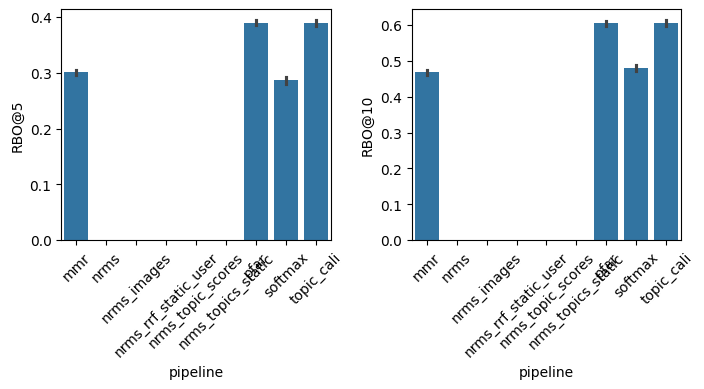

In [9]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_subset_user_metrics, x="pipeline", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [10]:
for metric in overlap_metrics:
    tw = EvalTable(mind_subset_user_metrics, "pipeline", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"mmr 0.301(0.296,0.305)","0.077(0.070,0.083)","0.228(0.216,0.235)","0.307(0.307,0.307)","0.378(0.378,0.383)",
"nrms 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_images 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_rrf_static_user 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topic_scores 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topics_static 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"pfar 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.287(0.280,0.293)","0.103(0.098,0.108)","0.134(0.121,0.148)","0.307(0.307,0.310)","0.396(0.396,0.410)",
"topic_cali 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",


"mmr 0.467(0.460,0.475)","0.119(0.109,0.130)","0.365(0.347,0.371)","0.492(0.483,0.498)","0.580(0.575,0.589)",
"nrms 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_images 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_rrf_static_user 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topic_scores 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topics_static 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"pfar 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.479(0.470,0.487)","0.138(0.129,0.148)","0.323(0.303,0.347)","0.508(0.497,0.521)","0.617(0.611,0.623)",
"topic_cali 0.604(0.596,0.612)","0.133(0.119,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
